<a href="https://colab.research.google.com/github/Bepitic/Data-Analytics/blob/main/Data_Analytics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importing Libraries and Data loading

In [ ]:
# data downloading and library importing

import pandas as pd
import seaborn as sns
from math import ceil,floor
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

url_data = 'https://drive.google.com/file/d/1HiPSDV8_PXhGMa7wNJomYkHdB-NzH5cB/view?usp=share_link'
url_data='https://drive.google.com/uc?id=' + url_data.split('/')[-2]

data = pd.read_csv(url_data)


## Data exploration/description

In [ ]:
data.head()

,vitaminA,vitminC,weight,diameter,fruit
0,5100.0,3500.0,1.4,2.0,cherry
1,4900.0,3000.0,1.4,2.0,cherry
2,4700.0,3200.0,1.3,2.0,cherry
3,4600.0,3100.0,1.5,2.0,cherry
4,5000.0,3600.0,1.4,2.0,cherry


In [ ]:
data.describe()

,vitaminA,vitminC,weight,diameter
count,149.000000,149.000000,148.000000,149.000000
mean,5838.926174,3059.060403,3.763514,11.953020
std,829.091933,436.821044,1.763467,7.632023
min,4300.000000,2000.000000,1.000000,1.000000
25%,5100.000000,2800.000000,1.600000,3.000000
50%,5800.000000,3000.000000,4.350000,13.000000
75%,6400.000000,3300.000000,5.100000,18.000000
max,7900.000000,4400.000000,6.900000,25.000000


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Print the columns with missing values and their corresponding counts
print("Missing Values:")
print(missing_values)

Missing Values:
vitaminA    1
vitminC     1
weight      2
diameter    1
fruit       0
dtype: int64


In [ ]:
# finding which of the variables is categorical and which not

data.select_dtypes(exclude=['object']).columns.tolist()

['vitaminA', 'vitminC', 'weight', 'diameter']

<ipython-input-6-cc5ff68ef55b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


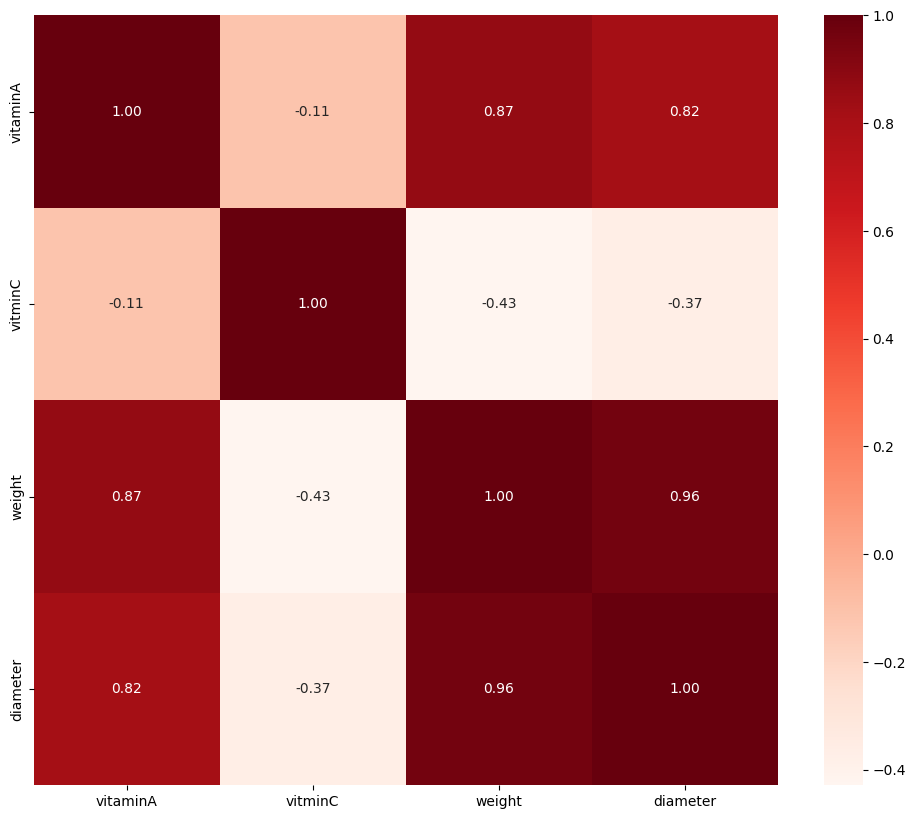

In [ ]:
# Using Pearson Correlation

plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds ,fmt='.2f')
plt.show()

<Axes: xlabel='vitaminA', ylabel='Count'>

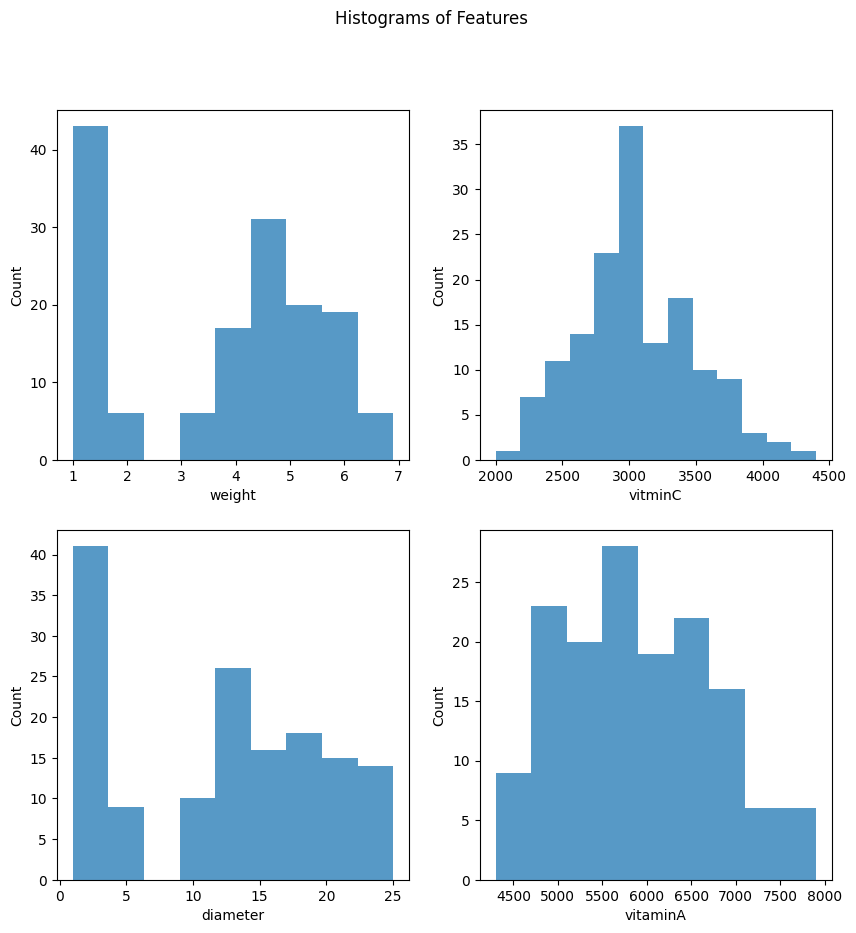

In [ ]:
# Histogram of features

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.suptitle('Histograms of Features')
sns.histplot(data=data, x='weight', stat='count', edgecolor=None, ax=axs[0,0])

sns.histplot(data=data, x='vitminC', stat='count', edgecolor=None, ax=axs[0,1])

sns.histplot(data=data, x='diameter', stat='count', edgecolor=None, ax=axs[1,0])

sns.histplot(data=data, x='vitaminA', stat='count', edgecolor=None, ax=axs[1,1])


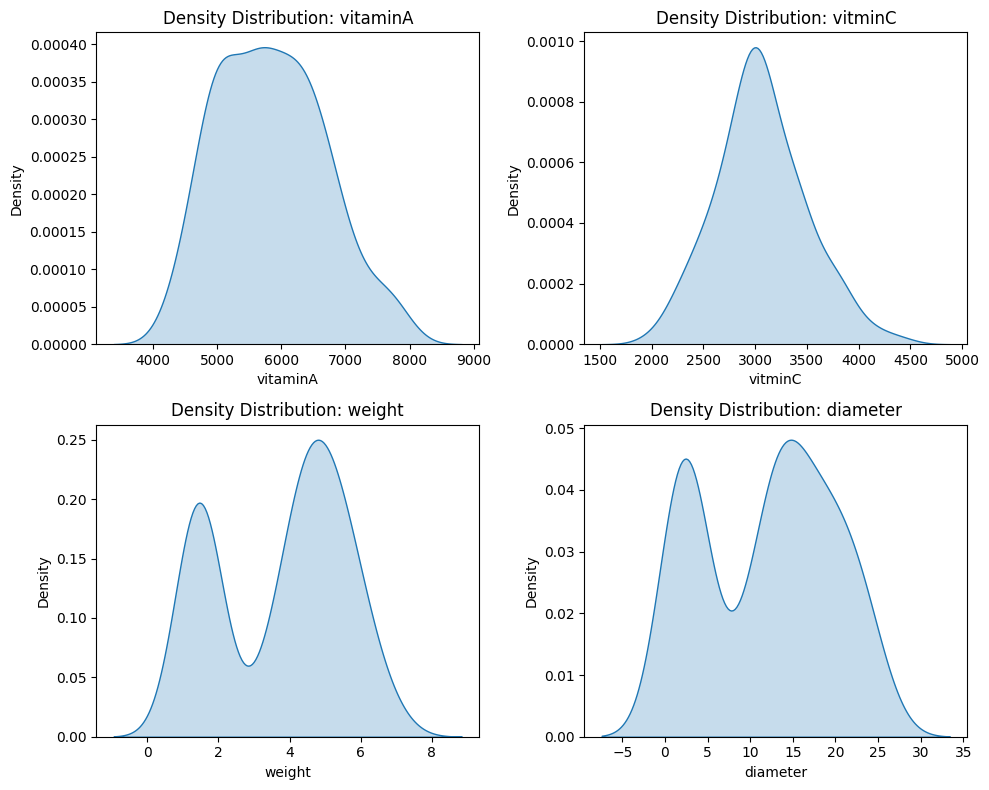

In [ ]:
#density distributions for each feature

def plot_density_distribution(data, bins=30):
    numerical_cols = data.select_dtypes(include=['float', 'int']).columns

    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs = axs.flatten()

    for i, col in enumerate(numerical_cols):
        sns.kdeplot(data[col], ax=axs[i], fill=True)
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Density')
        axs[i].set_title('Density Distribution: {}'.format(col))

    plt.tight_layout()
    plt.show()

plot_density_distribution(data)


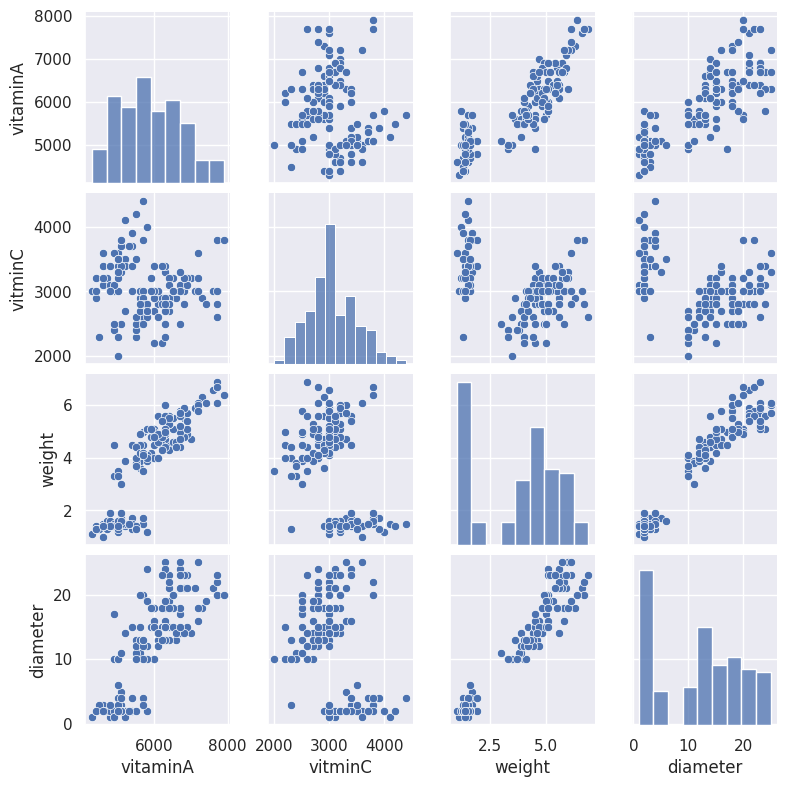

In [ ]:
# correlogram for the dataset

vars_to_plot = ['vitaminA', 'vitminC', 'weight', 'diameter']
sns.set(rc={'figure.figsize': (10, 8)})
sns.pairplot(data, height=2, aspect=1, kind='scatter')#, hue='fruit')
plt.show()

In [ ]:
# Fruit percentage per each feature.
# uncomment if interested to see.

# data['vitaminA_bins'] = pd.cut(data['vitaminA'], bins=100, labels=False)
# data['vitaminC_bins'] = pd.cut(data['vitminC'], bins=100, labels=False)
# data['weights_bins'] = pd.cut(data['weight'], bins=100, labels=False)
# data['diameter_bins'] = pd.cut(data['diameter'], bins=100, labels=False)

# sns.set_theme()
# fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# sns.barplot(data=data, x='vitaminA_bins', y='fruit', ax=axs[0][0], palette='coolwarm')
# sns.barplot(data=data, x='vitaminC_bins', y='fruit', ax=axs[0][1], palette='coolwarm')
# sns.barplot(data=data, x='weights_bins', y='fruit', ax=axs[1][0], palette='coolwarm')
# sns.barplot(data=data, x='diameter_bins', y='fruit', ax=axs[1][1], palette='coolwarm')

# axs[0][0].set_xlabel('Vitamin A')
# axs[0][1].set_xlabel('Vitamin C')
# axs[1][0].set_xlabel('Weights')
# axs[1][1].set_xlabel('Diameter')

# # Set the x-axis tick labels
# for ax in axs.flat:
#     ticks = np.linspace(0, 99, num=5)
#     ax.set_xticks(ticks)
#     ax.set_xticklabels([f'{int(tick)}%' for tick in ticks])#, rotation=90)


# # plt.suptitle('Histograms of Variables for different fruit')
# plt.tight_layout()
# plt.show()

# #drop the bins, we do not need them anymore
# data.drop('vitaminA_bins', axis=1, inplace=True)
# data.drop('vitaminC_bins', axis=1, inplace=True)
# data.drop('weights_bins', axis=1, inplace=True)
# data.drop('diameter_bins', axis=1, inplace=True)


/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


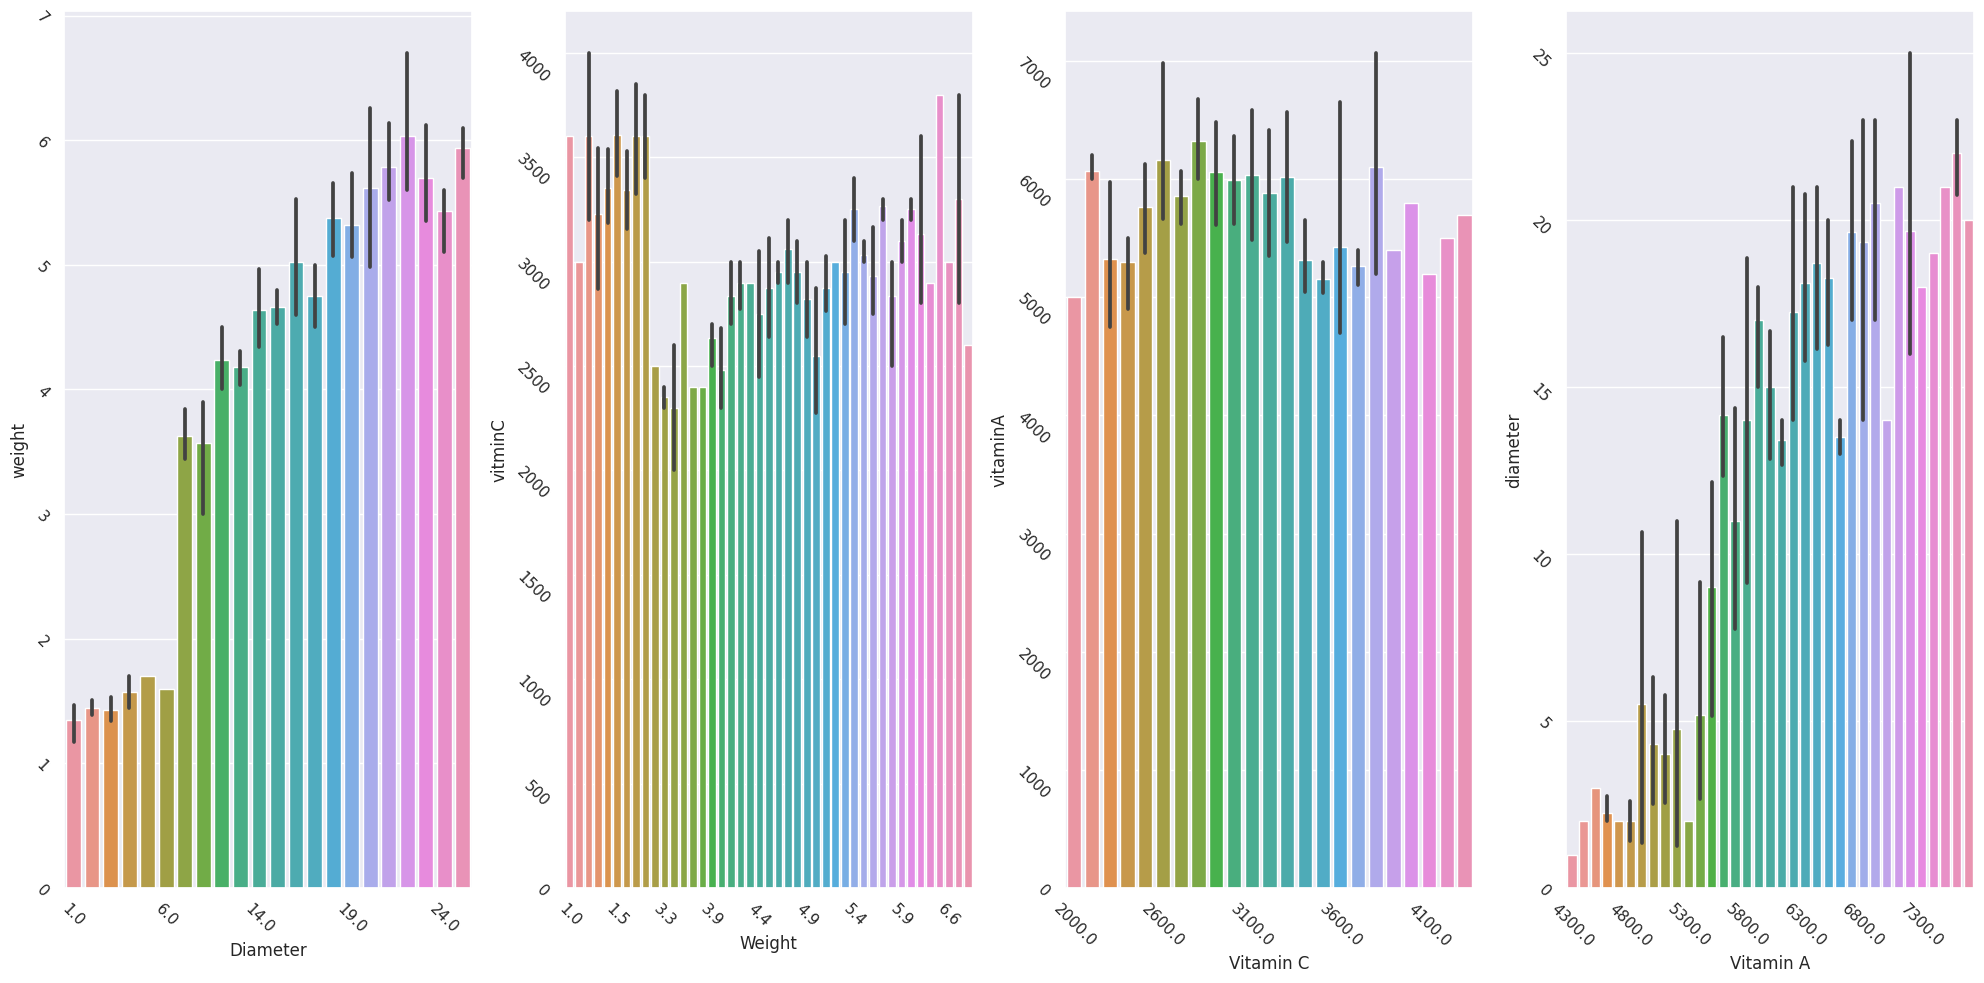

In [ ]:
# barplots for feature comparison

sns.set_theme()

fig, axs = plt.subplots(1, 4, figsize=(20, 10))

sns.barplot(data=data, x='diameter', y='weight', ax=axs[0])
sns.barplot(data=data, x='weight', y='vitminC', ax=axs[1])
sns.barplot(data=data, x='vitminC', y='vitaminA', ax=axs[2])
sns.barplot(data=data, x='vitaminA', y='diameter', ax=axs[3])

axs[0].set_xlabel('Diameter')

axs[1].set_xlabel('Weight')

axs[2].set_xlabel('Vitamin C')

axs[3].set_xlabel('Vitamin A')

for i in range(4):
  axs[i].tick_params(rotation=-45)
  every_nth = 5
  for n, label in enumerate(axs[i].xaxis.get_ticklabels()):
      if n % every_nth != 0:
          label.set_visible(False)

plt.tight_layout()
plt.show()

#Data preprocessing

In [ ]:
# filling the null values with the mean of the values that belong to that specific fruit

# fruit_groups = data.groupby('fruit')
# means = fruit_groups.mean()
# #print(means)

# for index, row in data.iterrows():
#     fruit = row['fruit']
#     for attribute in ['diameter', 'weight', 'vitaminA', 'vitminC']:
#         if pd.isnull(row[attribute]):
#             data.at[index, attribute] = means.loc[fruit, attribute]

# Removing the null values

data = data.dropna()

# Health check
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
vitaminA    0
vitminC     0
weight      0
diameter    0
fruit       0
dtype: int64


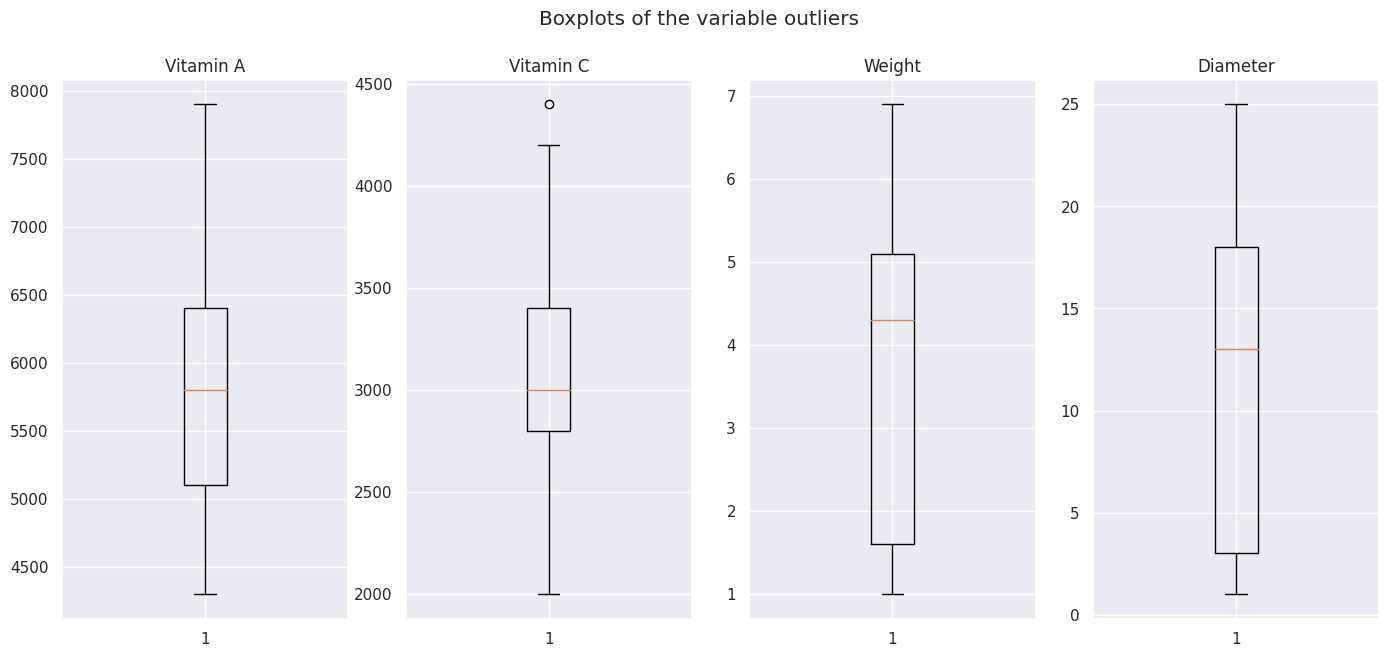

In [ ]:
# plotting the outliers

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(17, 7))

ax[0].boxplot(data['vitaminA'])
ax[0].set_title('Vitamin A')

ax[1].boxplot(data['vitminC'])
ax[1].set_title('Vitamin C')

ax[2].boxplot(data['weight'])
ax[2].set_title('Weight')

ax[3].boxplot(data['diameter'])
ax[3].set_title('Diameter')


# Set the title of the figure
fig.suptitle('Boxplots of the variable outliers')

# Show the plot
plt.show()

In [ ]:
# Removing the outliers

# data = data[(np.abs(stats.zscore(data[['vitminC', 'weight','diameter','vitaminA']])) < 3).all(axis=1)]

data = data[np.abs(stats.zscore(data['vitminC'])) < 3]



In [ ]:
# data normalisation

fruits = data['fruit']
data_to_normalize = data.drop(columns=['fruit'])
normalized_data = MinMaxScaler((-1,1)).fit_transform(data_to_normalize)
df_norm = pd.DataFrame(normalized_data, index=data_to_normalize.index, columns=data_to_normalize.columns)

data_norm = pd.concat([df_norm,fruits], axis=1)

print(data_norm.head())

   vitaminA   vitminC    weight  diameter   fruit
0 -0.555556  0.363636 -0.864407 -0.916667  cherry
1 -0.666667 -0.090909 -0.864407 -0.916667  cherry
2 -0.777778  0.090909 -0.898305 -0.916667  cherry
3 -0.833333  0.000000 -0.830508 -0.916667  cherry
4 -0.611111  0.454545 -0.864407 -0.916667  cherry


In [ ]:
# encoding the fruits into a vector with 0,1,2 values

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
vectorised_labels = label_encoder.fit_transform(data['fruit'])

print(vectorised_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# data separation

X = data_norm[['vitaminA','vitminC','diameter','weight']]
y = vectorised_labels


#Models

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

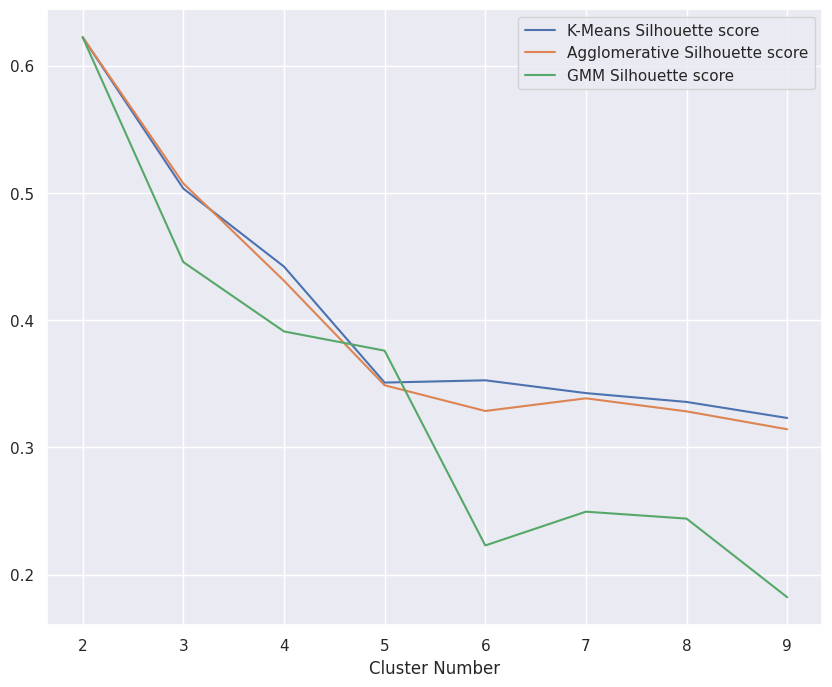

Optimal Number of Clusters: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Calculate the silhouette_score for the clusters and find the optimal number of clusters.

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


# Initialize lists to store evaluation metrics for each algorithm
kmeans_scores = []
agglomerative_scores = []
gmm_scores = []

# Apply clustering algorithms with different numbers of clusters
for n_clusters in range(2, 10):
    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_scores.append(silhouette_score(X, kmeans_labels))

    # Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    agglomerative_labels = agglomerative.fit_predict(X)
    agglomerative_scores.append(silhouette_score(X, agglomerative_labels))

    # Gaussian Mixture Models (GMM)
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    gmm_labels = gmm.fit_predict(X)
    gmm_scores.append(silhouette_score(X, gmm_labels))


# Compare the performance of the clustering algorithms for different cluster numbers
results_df = pd.DataFrame({
    'Cluster Number': range(2, 10),
    'K-Means Silhouette score': kmeans_scores,
    'Agglomerative Silhouette score': agglomerative_scores,
    'GMM Silhouette score': gmm_scores,

})

# print(kmeans_scores)
# print(agglomerative_scores)
# print(gmm_scores)



results_df['Average Silhouette score'] = results_df[['K-Means Silhouette score','Agglomerative Silhouette score','GMM Silhouette score']].mean(axis=1)
optimal_cluster_number = results_df['Cluster Number'].iloc[results_df['Average Silhouette score'].idxmax()]

#print(results_df)
#print(results_df.head())
results_df[['K-Means Silhouette score','Agglomerative Silhouette score','GMM Silhouette score']].set_index(results_df['Cluster Number']).plot()
plt.show()

# Print the optimal number of clusters
print("Optimal Number of Clusters:", optimal_cluster_number)

# K-Means Clustering
kmeans = KMeans(n_clusters=optimal_cluster_number, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

# Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=optimal_cluster_number)
agglomerative_labels = agglomerative.fit_predict(X)

# Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=optimal_cluster_number, random_state=0)
gmm_labels = gmm.fit_predict(X)



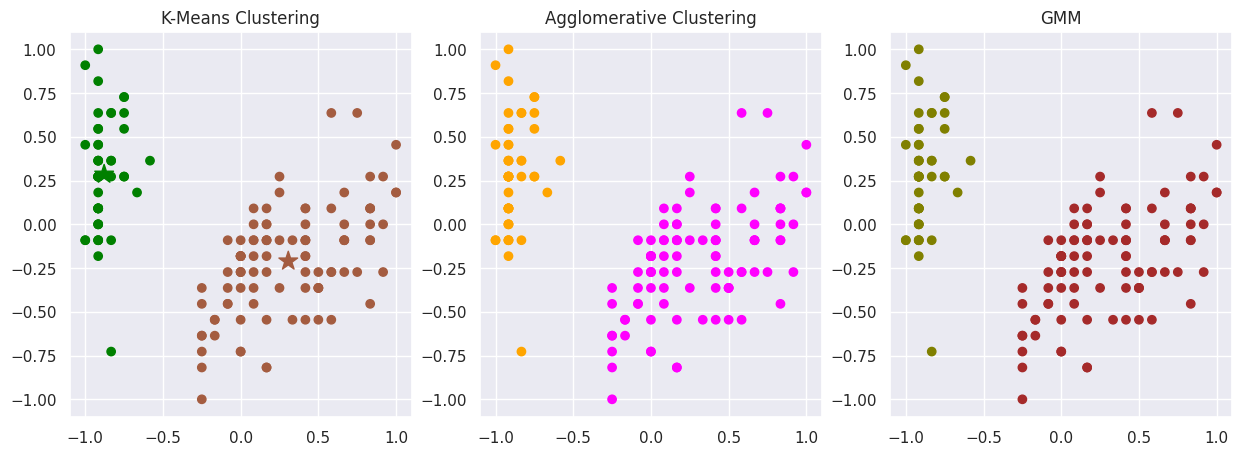

In [ ]:
import matplotlib.pyplot as plt

# Define custom colors for each cluster
kmeans_colors = [ 'green', '#A45C40', 'brown']

if optimal_cluster_number == 2:
  kmeans_colors = [ 'green', '#A45C40']#, 'brown']
if optimal_cluster_number == 3:
  kmeans_colors = [ 'green', '#A45C40', 'brown']

agglomerative_colors = [ 'magenta', 'orange',"#4297A0"]
gmm_colors = ['olive', 'brown', '#DE847B', '#B95C50']
plt.figure(figsize=(15, 5))


# K-Means Clustering
plt.subplot(1, 3, 1)
plt.scatter(X['diameter'], X['vitminC'], c=[kmeans_colors[label] for label in kmeans_labels])
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 1], marker='*', s=200, c=kmeans_colors)
plt.title('K-Means Clustering')

# Agglomerative Clustering
plt.subplot(1, 3, 2)
plt.scatter(X['diameter'], X['vitminC'], c=[agglomerative_colors[label] for label in agglomerative_labels])
plt.title('Agglomerative Clustering')

# Gaussian Mixture Models (GMM)
plt.subplot(1, 3, 3)
plt.scatter(X['diameter'], X['vitminC'], c=[gmm_colors[label] for label in gmm_labels])
plt.title('GMM')

plt.show()


<ipython-input-20-faaffc8a57f6>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(X['weight'], X['vitaminA'], X['vitminC'], c=[kmeans_colors[label] for label in kmeans_labels], cmap='viridis')
<ipython-input-20-faaffc8a57f6>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(X['weight'], X['vitaminA'], X['vitminC'], c=[agglomerative_colors[label] for label in agglomerative_labels], cmap='viridis')
<ipython-input-20-faaffc8a57f6>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax3.scatter(X['weight'], X['vitaminA'], X['vitminC'], c=[gmm_colors[label] for label in gmm_labels], cmap='viridis')


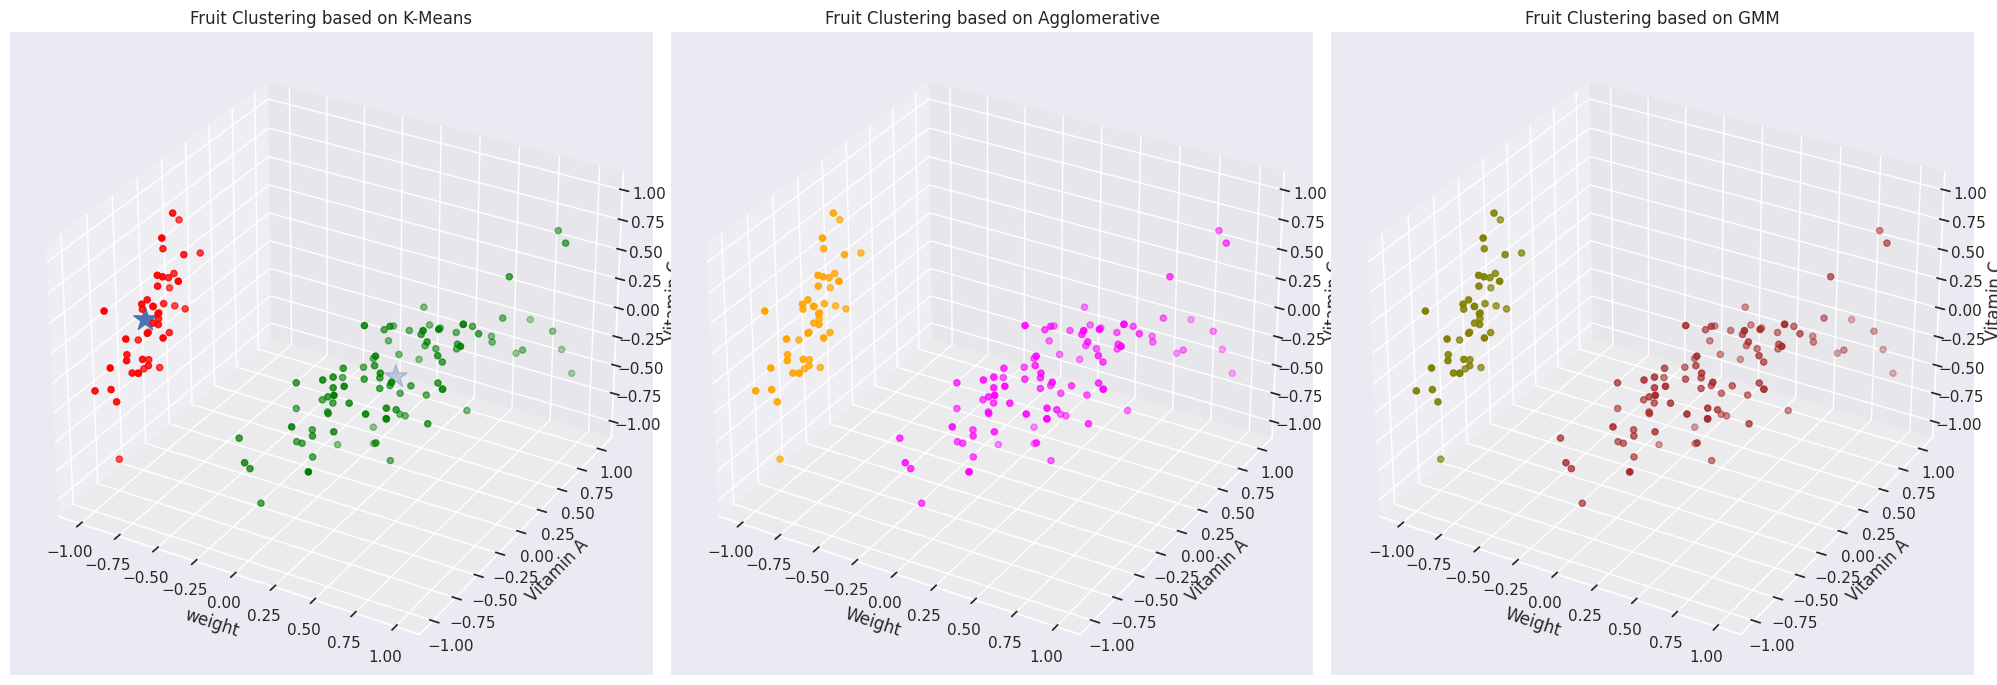

In [ ]:
# 3D plotting, does not work in the case 3 of 2 features because 2 dimensions

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set the figure size
plt.figure(figsize=(20, 7))

kmeans_colors = ['red', 'green', '#A45C40']
agglomerative_colors = [ 'magenta', 'orange',"#4297A0"]
gmm_colors = ['olive', 'brown', '#DE847B', '#B95C50']

# Create the first subplot for K-means
ax1 = plt.subplot(1, 3, 1, projection='3d')
ax1.scatter(X['weight'], X['vitaminA'], X['vitminC'], c=[kmeans_colors[label] for label in kmeans_labels], cmap='viridis')
ax1.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300)
ax1.set_xlabel('weight')
ax1.set_ylabel('Vitamin A')
ax1.set_zlabel('Vitamin C')
ax1.set_title('Fruit Clustering based on K-Means')

# Create the second subplot for Agglomerative
ax2 = plt.subplot(1, 3, 2, projection='3d')
ax2.scatter(X['weight'], X['vitaminA'], X['vitminC'], c=[agglomerative_colors[label] for label in agglomerative_labels], cmap='viridis')
ax2.set_xlabel('Weight')
ax2.set_ylabel('Vitamin A')
ax2.set_zlabel('Vitamin C')
ax2.set_title('Fruit Clustering based on Agglomerative')

# Create the third subplot for GMM
ax3 = plt.subplot(1, 3, 3, projection='3d')
ax3.scatter(X['weight'], X['vitaminA'], X['vitminC'], c=[gmm_colors[label] for label in gmm_labels], cmap='viridis')
ax3.set_xlabel('Weight')
ax3.set_ylabel('Vitamin A')
ax3.set_zlabel('Vitamin C')
ax3.set_title('Fruit Clustering based on GMM')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# change for aglomerative. We change them manually when the label prediction shift the rows
from sklearn.metrics import confusion_matrix,classification_report
for i in range(len(agglomerative_labels)):
    if(agglomerative_labels[i]==1 ):
       agglomerative_labels[i] = 2
    elif(agglomerative_labels[i]==2):
        agglomerative_labels[i] = 1

In [ ]:
# change for gmm

for i in range(len(gmm_labels)):
    if(gmm_labels[i]==0 ):
       gmm_labels[i] = 1
    elif(gmm_labels[i]==1):
        gmm_labels[i] = 2


In [ ]:
# change for kmeans

for i in range(len(kmeans_labels)):
    if(kmeans_labels[i]==1 ):
       kmeans_labels[i] = 2
    elif(kmeans_labels[i]==2):
        kmeans_labels[i] = 1


In [ ]:
# model evaluations
cm1 = confusion_matrix(y, agglomerative_labels)
cr1 = classification_report(y, agglomerative_labels)
print("agglomerative")
print(cm1)
print(cr1)
print(y)
print(agglomerative_labels)

cm2 = confusion_matrix(y, gmm_labels)
cr2 = classification_report(y, gmm_labels)
print("GMM")

print(cm2)
print(cr2)
print(y)
print(gmm_labels)

cm3 = confusion_matrix(y, kmeans_labels)
cr3 = classification_report(y, kmeans_labels)
print("K-means")

print(cm3)
print(cr3)
print(y)
print(kmeans_labels)

agglomerative
[[47  0  0]
 [ 0  0 48]
 [49  0  0]]
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        47
           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        49

    accuracy                           0.33       144
   macro avg       0.16      0.33      0.22       144
weighted avg       0.16      0.33      0.21       144

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif